# Assignment 1: Linear Regression
### Name: Brandon Maness
### Email: bmaness3@uncc.edu
### Date: 01/30/2019
<font color='red'>Complete the TO DO Sections</font>

## Analysis of the data

In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import c_
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
import seaborn as sns

<font color = 'red'>TO DO: Download dataset from https://www.kaggle.com/shivachandel/kc-house-data </font>

In [2]:
# Load dataset
dataset = pd.read_csv('kc_house_data.csv')

In [3]:
#Print the first few rows in the dataset
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21611 non-null float64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 3.5+ MB


<font color='red'>TO DO: Describe the data in your own words in this markdown cell. How many attributes are there in the dataset? What do they signify? What is the size of the dataset? </font>

<b>Solution</b>:
The data is a frame of information collected about sold houses including layout information, assessment of quality, and location data.
<br>There are 21613 entries x 21 columns. With not missing datapoints, this is a total of 453,837 data entries
<br>This dataset has 21 different attributes as follows:
<br>id: identifier for the house
<br>date: date the house was sold
<br>price: price the house was sold at
<br>bedrooms: number of bedrooms
<br>bathrooms: number of bathrooms
<br>sqft_living: The square-footage of the inside of the house
<br>sqft_lot: The square-footage of the lot the house is on
<br>floors: amount of floors in the house
<br>waterfront: 0 if not waterfront, 1 if waterfront
<br>view: rates the view of the home from 0 to 4
<br>condition: rates condition of home from 1 to 5
<br>grade: grade given to describe quality of the house from 1 to 13
<br>sqft_above: square-footage of all floors minus the basement
<br>sqft_basement: square-footage of the basement
<br>yr_built: year the house was built
<br>yr_renovated: year renovated, 0 if never renovated
<br>zipcode: zipcode of the house
<br>lat: lattitude of the house
<br>long: longitude of the house
<br>sqft_living15: Some modified version of sqft_living
<br>sqft_lot15: Some modified version of sqft_lot

<font color = 'red'> TO DO: Plot the correlation matrix. This gives an idea as to which attribute is most likely to contribute linearly to the target variable (price). </font>

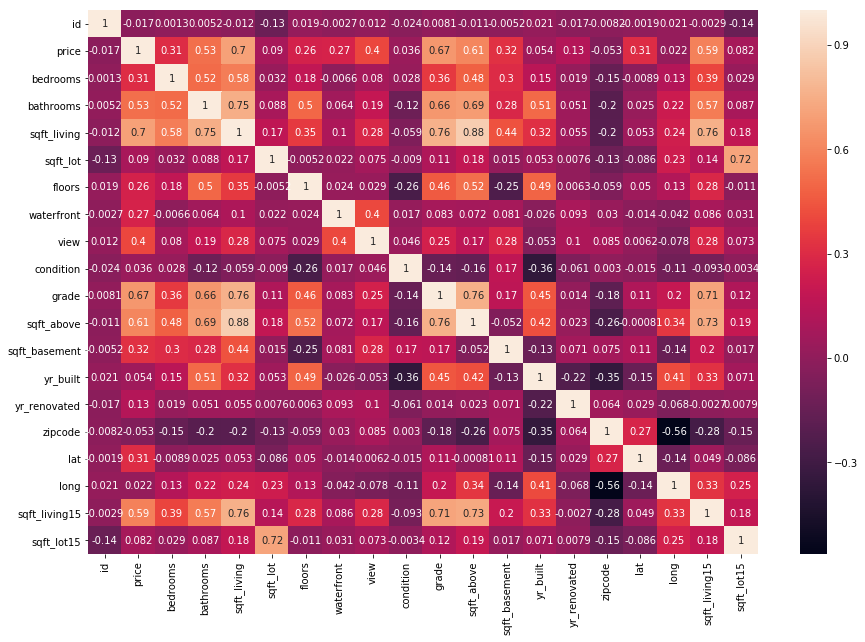

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

Text(0.5, 1.0, 'Price v/s Sq. Feet')

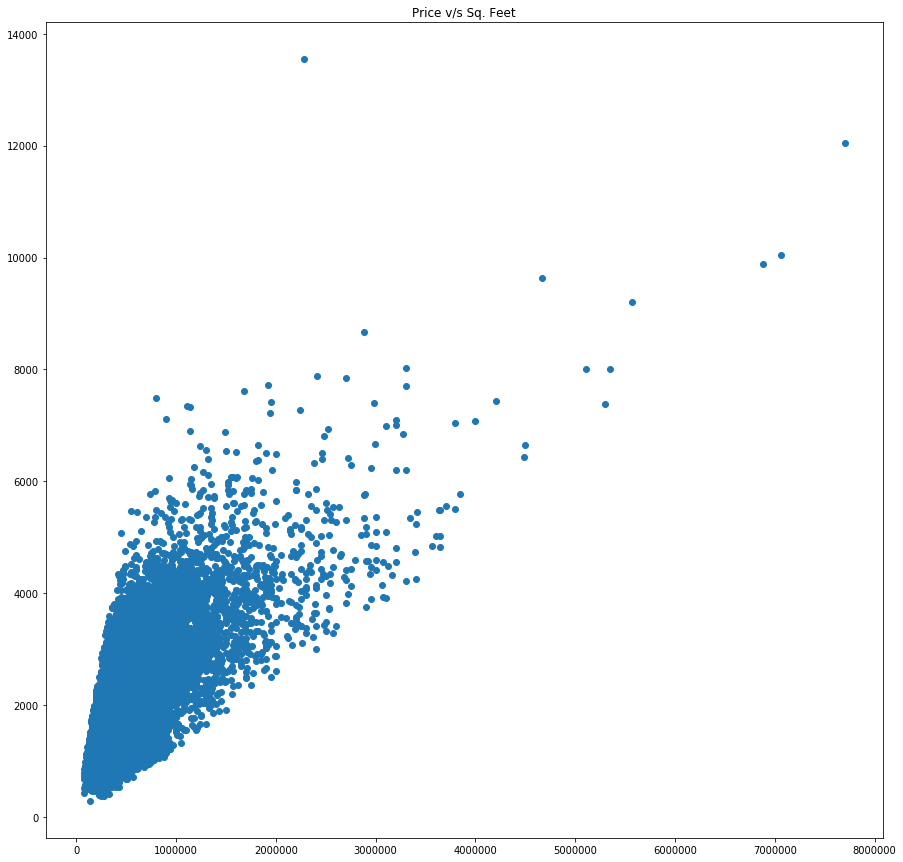

In [7]:
# From the correlation matrix, I got an idea that 'sqft_living' seems to contribute the most, linearly to price. 
# Here's the scatter plot for the same.
# We understand that as the 'sqft_living' increases, price increases with the exception of some outliers.
plt.figure(figsize=(15, 15))
plt.scatter(dataset.price, dataset.sqft_living)
plt.title('Price v/s Sq. Feet')

<font color = 'red'> TO DO: How do other attributes relate to the 'price'? Plot the scatter plots for them and describe your observations. </font>

Text(0.5, 1.0, 'Price v/s Bathrooms')

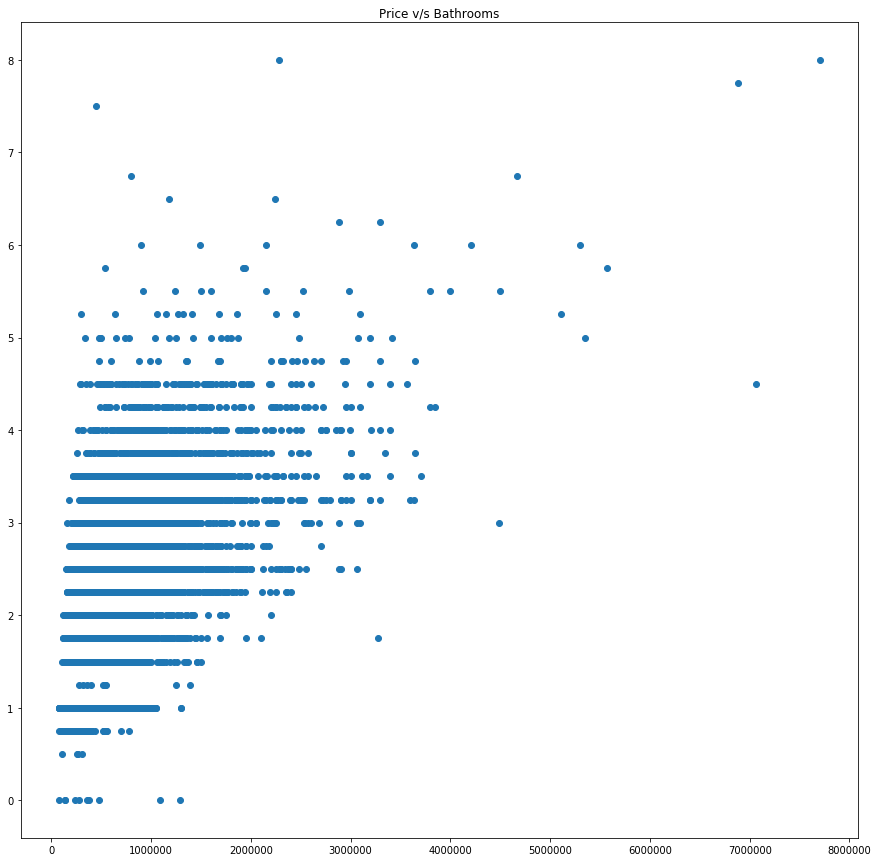

In [8]:
plt.figure(figsize=(15, 15))
plt.scatter(dataset.price, dataset.bathrooms)
plt.title('Price v/s Bathrooms')
#this one is odd because bathrooms is a int value, but it still follows based on the pearson corr. coefficient

Text(0.5, 1.0, 'Price v/s grade')

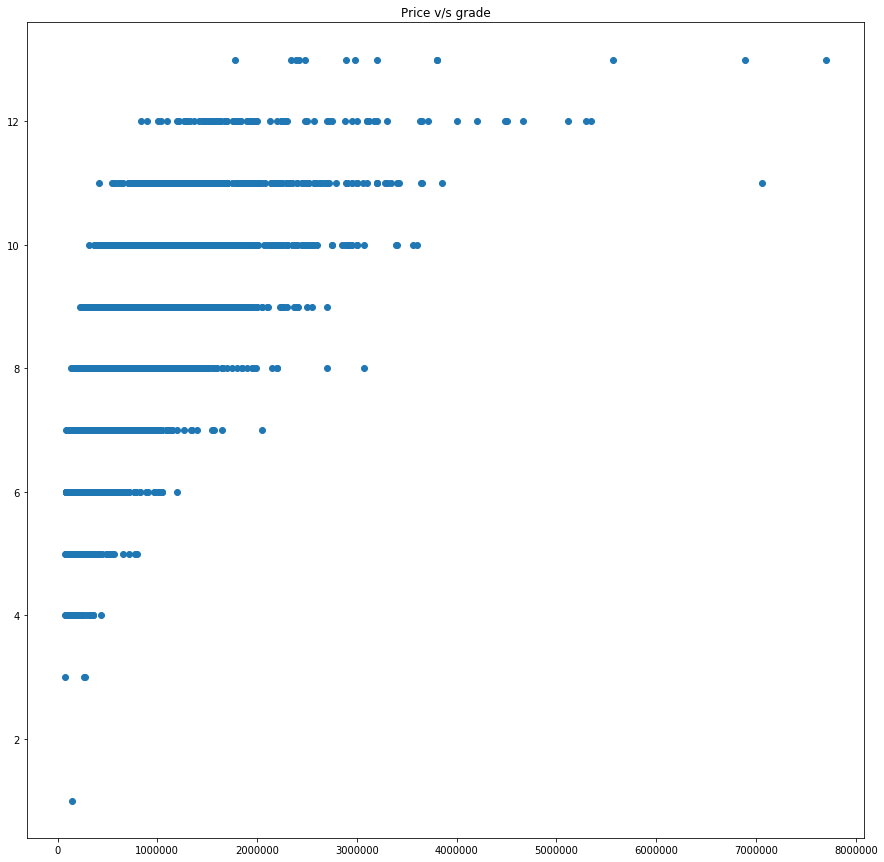

In [9]:
plt.figure(figsize=(15, 15))
plt.scatter(dataset.price, dataset.grade)
plt.title('Price v/s grade')

## Pre-processing

In [10]:
# Let us check if our datset contains some missing values...
dataset.isnull().values.any()

True

<font color = 'red'> TO DO: Drop rows containing NaN values. </font>

In [11]:
dataset.dropna(inplace=True)

<font color = 'red'> TO DO: Drop colum 'id' as it is irrelevant in predicting the price of the house. You may drop 'date' as well. If not you will have to convert 'date' to a numerical entry. Here's a hint: 1 if values == 2014 else 0 for values in dataset.date </font>

In [12]:
dataset = dataset.drop(['id','date'], axis=1)

In [13]:

# Your dataframe must now be looking like this...
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


<font color = 'red'> TO DO: Normalization. You can try performing the standard mean normalization on the dataframe. </font>

In [14]:
scaler = StandardScaler()
print(scaler.fit(dataset))
print("mean")
print(scaler.mean_)
print ("Transform dataset")
dataset = scaler.transform(dataset)
print (dataset[:,0])


StandardScaler(copy=True, with_mean=True, with_std=True)
mean
[ 5.40085027e+05  3.37082967e+00  2.11479108e+00  2.07985345e+03
  1.51077134e+04  1.49433159e+00  7.54245523e-03  2.34325112e-01
  3.40942113e+00  7.65688770e+00  1.78839609e+03  2.91457360e+02
  1.97100796e+03  8.44100689e+01  9.80779419e+04  4.75600458e+01
 -1.22213894e+02  1.98655958e+03  1.27690254e+04]
Transform dataset
[-0.86667142 -0.00567919 -0.98079852 ... -0.37584048 -0.38156318
 -0.58584795]


C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Brandon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [15]:
# Your dataframe must now be looking like this...
#It does, but its a numpy array so this won't work anymore
#dataset.head()

In [16]:
# We must also store 'price' column in some other variable (labels)
labels = dataset[:,0]
#train_1 = dataset.drop([0], axis = 1)
#adjusting for numpy array object
train_1 = np.delete(dataset, [0], axis=1)

In [17]:
labels.shape

(21611,)

In [18]:
# Now let us split our data into training and testing...

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_1, labels, test_size = 0.10, random_state = 2)

<font color ='red'> TO DO: To perform operations on the dataframe, we must store it in matrices. Hence, your task is to store the dataframe 'x_train' in matrix 'X'. Further you should store 'y_train' column in a vector 'y'. After that you must concatenate '1's' in X as the 'bias'. </font>

In [19]:
# Your matrix X should look like...
X = np.matrix(x_train)
z = np.ones((19449,1))
X = np.c_[z,X]
X.shape

(19449, 19)

In [20]:
# Your matrix y should look like...
y = np.matrix(y_train).T
y.shape

(19449, 1)

<font color = 'red'> TO DO: Now initialize a matrix 'theta' to store the weights after you perform gradient descent. </font>

In [21]:
# Your matrix theta must look like...
theta = np.zeros((1,19))

In [22]:
# Here's how the dimensions of your matrix must look like...
print(X.shape, y.shape, theta.shape)

(19449, 19) (19449, 1) (1, 19)


In [23]:
# Set hyper parameters
alpha = 0.01
iters = 1000

## Multivariate Linear Regression

### Least Squares (Analytical way of linear regression)

<font color = 'red'> TO DO: Fill out the following codes... </font>

In [24]:
def least_squares(X, y):
    g_least_squares = inv(X.T.dot(X)).dot(X.T).dot(y)
    print (g_least_squares)
    return g_least_squares

In [25]:
# Your weight matrix (g_least_squares) must look like...
least_squares(X, y).shape

[[ 0.00207697]
 [ 0.04824325]
 [ 0.41392342]
 [ 0.24529208]
 [ 0.02479794]
 [ 0.07575831]
 [ 0.14688203]
 [ 0.08984957]
 [ 0.0406849 ]
 [ 0.33901481]
 [-0.41395983]
 [-0.17110672]
 [-0.21007121]
 [ 0.0236654 ]
 [-0.08508823]
 [ 0.22604316]
 [-0.08240274]
 [ 0.04088693]
 [-0.02970391]]


(19, 1)

### Gradient Descent

<font color = 'red'> TO DO: Complete the following codes... </font>

In [26]:
# Cost function: The compute_cost function takes X,y and theta as parameters and computes the cost.
def compute_cost(X, y, theta):
    theta = np.reshape(theta,(1,19))
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [27]:
# Gradient Descent Function
def gradient_descent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    xTrans = X.transpose()
    for i in range(iters):
        theta = np.reshape(theta, (19,1))
        hypothesis = np.dot(X,theta)
        loss = hypothesis-y
        gradient = np.dot(xTrans, loss)/len(y)
        theta = theta - alpha*(gradient)
        cost[i] = compute_cost(X, y, theta)
    
    return theta, cost

In [28]:
# Here's how our weights must look like...
g, cost = gradient_descent(X, y, theta, iters, alpha)
print(g)

[[ 0.00201266]
 [-0.09344952]
 [ 0.08553675]
 [ 0.22384515]
 [ 0.01625645]
 [ 0.01038176]
 [ 0.14391581]
 [ 0.10638996]
 [ 0.04915832]
 [ 0.29397099]
 [ 0.20837618]
 [ 0.07462861]
 [-0.20246759]
 [ 0.02645305]
 [-0.0822642 ]
 [ 0.22679853]
 [-0.08493343]
 [ 0.0556109 ]
 [-0.02938363]]


In [29]:
# Here's how my cost at convergence looks...
finalCost = compute_cost(X,y,g)
print(finalCost)

0.15184917340945422


Text(0.5, 1.0, 'Error vs. Training Epoch')

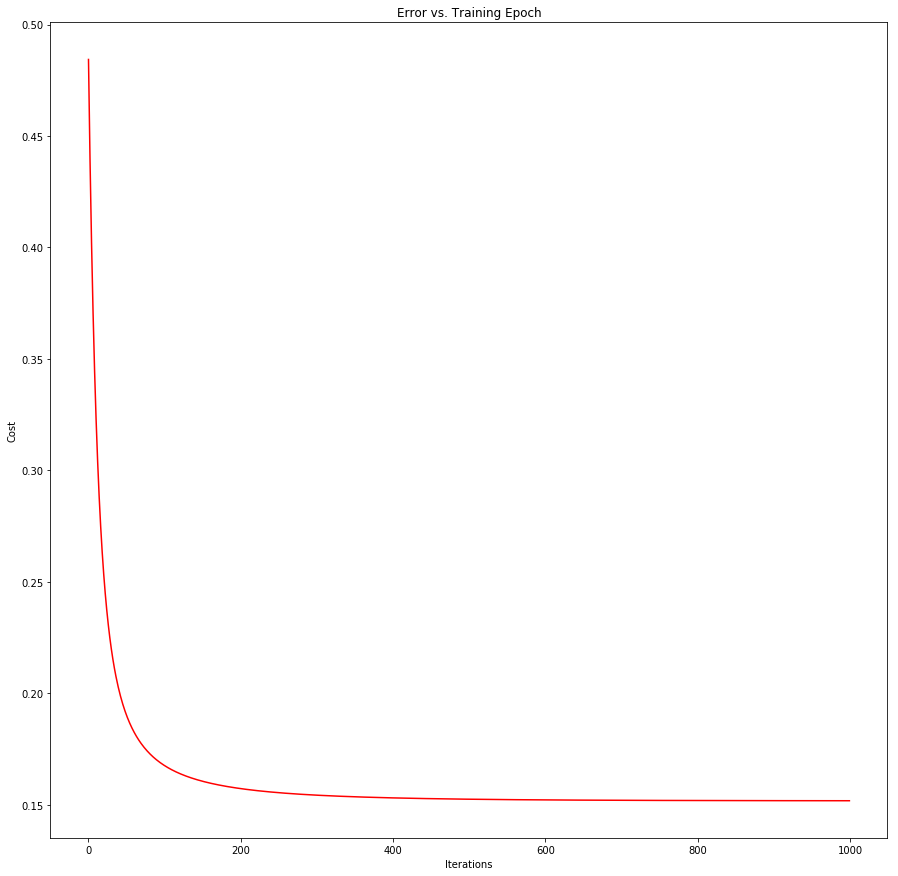

In [30]:
# Let's plot the cost history over iterations
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')